# FinanceDataReader 사용자 안내서

<img src="https://i.imgur.com/r0YE5Xs.png"> 

한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리

<!-- TEASER_END -->
### 2018 FinanceData.KR

In [1]:
#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [2]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

# 개요

금융 데이터를 다루는데 가장 기본이 되는 데이터는 거래소별 전체 종목 코드와 가격 데이터 이다.

[pandas-datareader](https://pandas-datareader.readthedocs.io) 는 잘 구성된 시계열 데이터 수집 라이브러리로 사용이 간편하고 다양한 시계열 데이터를 수집할 수 있다는 장점이 있다.  (현재 버전 : pandas_datareader 0.6.0) 하지만, 거래소별(KRX, NASDAQ, NYSE 등) 전체 종목 코드(ticker symbol)를 가져오는 기능이 없으며, 야후 파이낸스가 더 이상지원되지 않고(deprecated), 구글 파이낸스는 UNSTABLE_WARNING + RemoteDataError 를 낸다. 

FinanceDataReader는 [pandas-datareader](https://pandas-datareader.readthedocs.io) 를 대체하기 보다 보완하기 위한 목적으로 만들어졌다. 주요한 기능은 다음과 같다.

### 종목 코드
* 거래소별 전체 종목코드: KRX (KOSPI, KODAQ, KONEX), NASDAQ, NYSE, AMEX, S&P 500

### 가격 데이터
* 해외주식 가격 데이터: AAPL(애플), AMZN(아마존), GOOG(구글) 등
* 국내주식 가격 데이터: 005930(삼성전자), 091990(셀트리온헬스케어) 등
* 각종 지수: KS11(코스피지수), KQ11(코스닥지수), DJI(다우지수), IXIC(나스닥 지수), US500(S&P 5000)
* 환율 데이터: USD/KRX (원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRW: 위엔화 원화 환율
* 암호화폐 가격: BTC/USD (비트코인 달러 가격, Bitfinex), BTC/KRW (비트코인 원화 가격, 빗썸)


# 설치

```bash
pip install -U finance-datareader
```

# 사용

In [3]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.31'

# 전체 종목 코드
종목 데이터 전체를 얻기 위해 사용할 수 있는 거래소 심볼은 다음과 같다

### 한국

심볼 | 거래소
--------|-----------|----------- 
KRX | KRX 종목 전체
KOSPI | KOSPI 종목   
KOSDAQ  | KOSDAQ 종목 
KONEX  | KONEX 종목

### 미국
심볼 | 거래소
--------|-----------|----------- 
NASDAQ | 나스닥 종목 
NYSE  |뉴욕 증권거래소 종목	 
AMEX  | AMEX 종목  
SP500 | S&P 500 종목 


※ KRX는 KOSPI,KOSDAQ,KONEX 모두 포함

In [4]:
import FinanceDataReader as fdr

# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [5]:
len(df_krx)

7909

In [6]:
# S&P 500 종목 전체
df_spx = fdr.StockListing('S&P500')
df_spx.head()

/Users/Angela/opt/anaconda3/lib/python3.9/site-packages/FinanceDataReader/wikipedia/listing.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Symbol'] = df['Symbol'].str.replace('\.', '')


,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment


In [7]:
len(df_spx)

505

# 가격 데이터 - 국내주식
단축 코드(6자리)를 사용.

* 코스피 종목: 068270(셀트리온), 005380(현대차)  등
* 코스닥 종목: 215600(신라젠), 151910(나노스) 등

In [8]:
import FinanceDataReader as fdr

# 신세계, 2021년
df = fdr.DataReader('004170', '2021')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,241500,241500,237500,238500,111422,-0.004175
2021-01-05,237500,240500,235000,239500,107430,0.004193
2021-01-06,241000,242000,237000,237000,112348,-0.010438
2021-01-07,238500,241500,237500,240000,146623,0.012658
2021-01-08,240500,251500,240000,247500,277387,0.031250
2021-01-11,253000,255000,240500,243000,277187,-0.018182
2021-01-12,242500,258500,240000,255000,379558,0.049383
2021-01-13,258000,258000,251000,254000,190149,-0.003922
2021-01-14,254500,260000,251500,254000,201518,0.000000


<AxesSubplot:xlabel='Date'>

findfont: Font family ['nanummyeongjo'] not found. Falling back to DejaVu Sans.


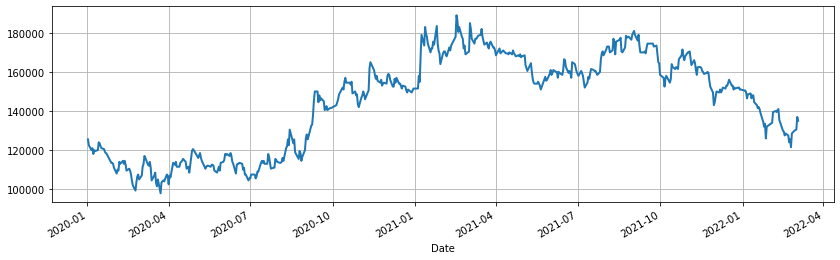

In [9]:
# 이마트, 2020년~현재

df = fdr.DataReader('139480', '2020')
df['Close'].plot()

# 가격 데이터 - 미국 주식
티커를 사용. 예를 들어, 'AAPL'(애플), 'AMZN'(아마존), 'GOOG'(구글)

In [10]:
import FinanceDataReader as fdr

# 애플(AAPL), 2022-01-01 ~ 2022-02-28
df = fdr.DataReader('AAPL', '2022-01-01', '2022-02-28')
df.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-02-22,164.32,164.98,166.69,162.15,90460000.0,-0.0178
2022-02-23,160.07,165.54,166.15,159.75,88500000.0,-0.0259
2022-02-24,162.74,152.58,162.85,152.00,140170000.0,0.0167
2022-02-25,164.85,163.84,165.12,160.87,91970000.0,0.0130
2022-02-28,165.12,163.06,165.42,162.43,92550000.0,0.0016


<AxesSubplot:xlabel='Date'>

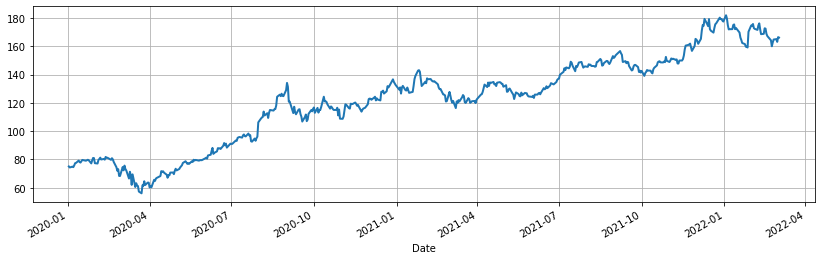

In [11]:
# 애플(AAPL), 2020년
df = fdr.DataReader('AAPL', '2020')
df['Close'].plot()

<AxesSubplot:xlabel='Date'>

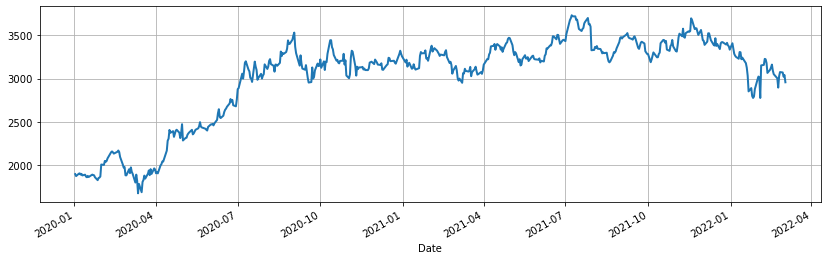

In [12]:
# 아마존(AMZN), 2010~현재
df = fdr.DataReader('AMZN', '2020')
df['Close'].plot()

<AxesSubplot:xlabel='Date'>

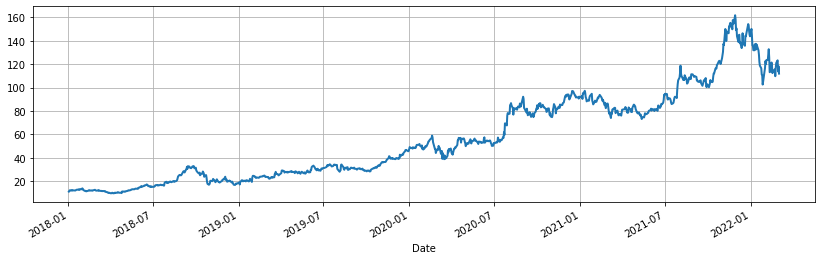

In [16]:
amd = fdr.DataReader('AMD', '2018')
amd['Close'].plot()

<AxesSubplot:xlabel='Date'>

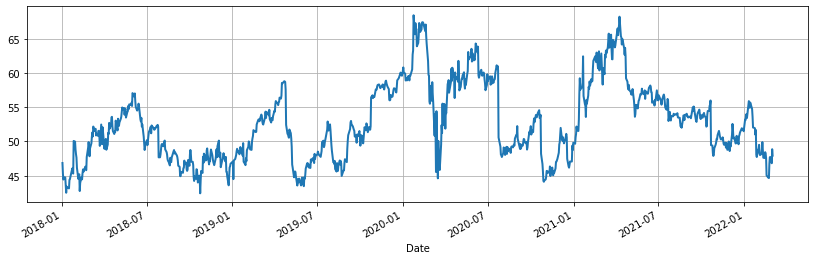

In [17]:
intel = fdr.DataReader('INTC', '2018')
intel['Close'].plot()

<AxesSubplot:xlabel='Date'>

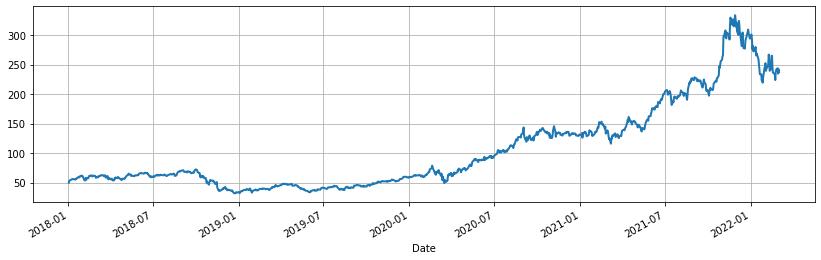

In [18]:
nvid = fdr.DataReader('NVDA', '2018')
nvid['Close'].plot()

### AMD, INTEL, NVIDIA 합쳐서 같이보기

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]

In [40]:
cpstocks = pd.concat([amd['Close'], intel['Close'], nvid['Close']], axis = 1)
cpstocks

,Close,Close,Close
Date,,,
2018-01-02,10.98,46.85,49.84
2018-01-03,11.55,45.26,53.12
2018-01-04,12.12,44.43,53.40
2018-01-05,11.88,44.74,53.85
2018-01-08,12.28,44.74,55.50
...,...,...,...
2022-02-25,121.06,47.71,241.57
2022-02-28,123.34,47.70,243.85
2022-03-01,113.83,46.82,234.77


In [42]:
cpstocks.columns = ['AMD','INTL','NVDA']

In [43]:
cpstocks

,AMD,INTL,NVDA
Date,,,
2018-01-02,10.98,46.85,49.84
2018-01-03,11.55,45.26,53.12
2018-01-04,12.12,44.43,53.40
2018-01-05,11.88,44.74,53.85
2018-01-08,12.28,44.74,55.50
...,...,...,...
2022-02-25,121.06,47.71,241.57
2022-02-28,123.34,47.70,243.85
2022-03-01,113.83,46.82,234.77


<AxesSubplot:xlabel='Date'>

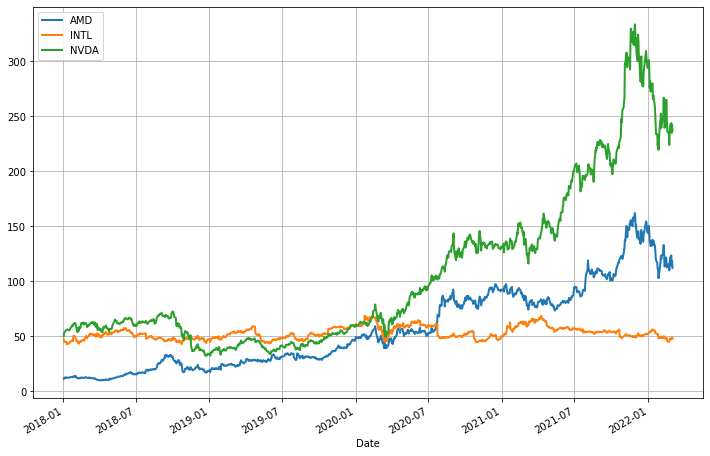

In [52]:
cpstocks.plot()

# 한국 지수
심볼 | 설명
---------- | ---------------
KS11 | KOSPI 지수
KQ11 | KOSDAQ 지수
KS50 | KOSPI 50 지수
KS100 | KOSPI 100
KRX100 | KRX 100 
KS200 | 코스피 200

# 미국 지수
심볼 | 설명
---------- | ---------------
DJI | 다우존스 지수
IXIC | 나스닥 지수
US500 | S&P 500 지수
VIX | S&P 500 VIX

※ DJI, IXIC, US500 가 미국 3대 지수

# 국가별 주요 지수
심볼 | 설명
---------- | ---------------
JP255 | 닛케이 225 선물
STOXX50E | Euro Stoxx 50
CSI300 | CSI 300 (중국)
HSI | 항셍 (홍콩)
FTSE | 영국 FTSE
DAX | 독일 DAX 30
CAC | 프랑스 CAC 40

<AxesSubplot:xlabel='Date'>

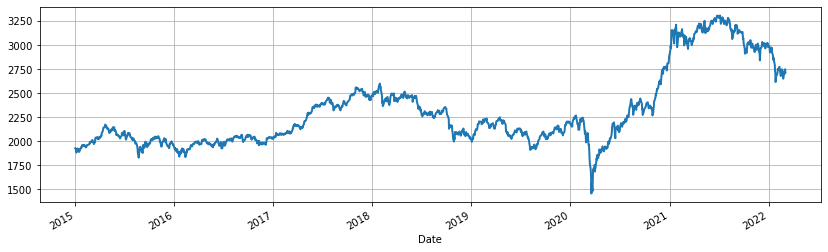

In [15]:
# KS11 (KOSPI 지수), 2015년~현재
df = fdr.DataReader('KS11', '2015')
df['Close'].plot()

<AxesSubplot:xlabel='Date'>

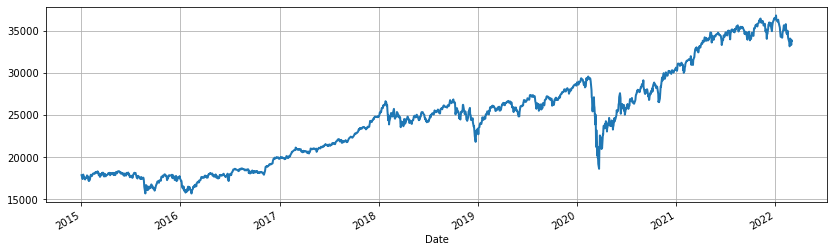

In [16]:
# 다우지수, 2015년~현재

df = fdr.DataReader('DJI', '2015')
df['Close'].plot()

# 환율

심볼 | 설명
---------- | ---------------
USD/KRW | 달러당 원화 환율
USD/EUR | 달러당 유로화 환율
USD/JPY | 달러당 엔화 환율
CNY/KRW | 위엔화 원화 환율
EUR/USD	| 유로화 달러 환율
USD/JPY | 달러 엔화 환율
JPY/KRW	| 엔화 원화 환율
AUD/USD	| 오스트레일리아 달러 환율
EUR/JPY	| 유로화 엔화 환율
USD/RUB	| 달러 루블화        

매우 유용해보인다.

<AxesSubplot:xlabel='Date'>

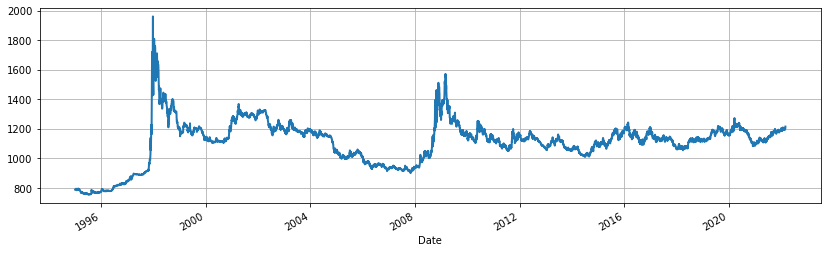

In [17]:
# 원달러 환율, 1995년~현재

df = fdr.DataReader('USD/KRW', '1995')
df['Close'].plot()

<AxesSubplot:xlabel='Date'>

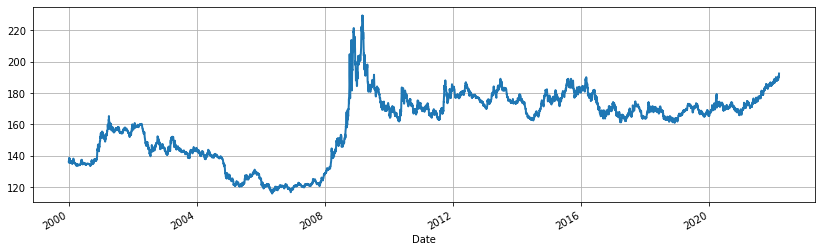

In [18]:
# 위엔화 환율, 1995년~현재

df = fdr.DataReader('CNY/KRW', '1995')
df['Close'].plot()

#  암호화폐 가격 (KRW)
암호 화폐 원화 가격 (빗썸)

심볼 | 설명
---------- | ---------------
BTC/KRW | 비트코인 원화 가격
ETH/KRW | 이더리움 원화 가격
XRP/KRW | 리플 원화 가격
BCH/KRW | 비트코인 캐시 원화 가격
EOS/KRW | 이오스 원화 가격
LTC/KRW |  라이트 코인 원화 가격
XLM/KRW | 스텔라 원화 가격

아니, 비트코인 가격도 제공한다고?!

#  암호화폐 가격 (UDS)
암호 화폐 달러화 가격 (Bitfinex)

심볼 | 설명
---------- | ---------------
BTC/USD | 비트코인 달러 가격
ETH/USD | 이더리움 달러 가격
XRP/USD | 리플 달러 가격
BCH/USD | 비트코인 캐시 달러 가격
EOS/USD | 이오스 달러 가격
LTC/USD |  라이트 코인 달러 가격
XLM/USD | 스텔라 달러 가격 

#  암호화폐 선물

심볼 | 설명
---------- | ---------------
BTC | 비트코인 CME 선물

<AxesSubplot:xlabel='Date'>

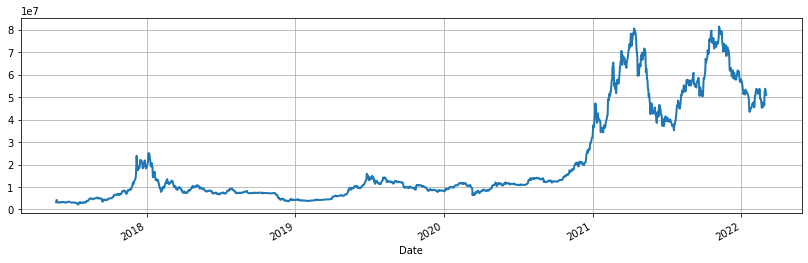

In [19]:
# 비트코인 원화 가격 (빗썸), 2016년~현재

df = fdr.DataReader('BTC/KRW', '2016')
df['Close'].plot()

In [20]:
# CME 비트코인 선물 가격

df = fdr.DataReader('BTC', '2017')
df['Close'].plot()

ValueError: Symbol('BTC'), Exchange('None') not found

비트코인 선물은 없어진 것인지 존재하지 않는다고 뜬다.

### 2018 https://fb.com/financedata

### 2022 https://github.com/FinanceData/FinanceDataReader